In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [7]:
Car_raw = pd.read_csv("/home/piai/다운로드/Preprocessed_Car.csv")
Car_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
7071,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6
7072,VOLVO XC90 2007-2015 D5 AWD,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,4
7073,VOLVO XC90 2007-2015 D5 AWD,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,5


In [31]:
df= Car_raw.drop(["Name","Model"], axis = 1, inplace = False)

In [32]:
df_dummy = pd.get_dummies(df)

df_y = df_dummy["Price"]
df_x = df_dummy.drop(["Price"], axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y
                                                                , test_size = 0.3, random_state = 1234) 

In [33]:
#모델 생성 
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.975
Score on test set: 0.881


## n_tree

In [34]:
# train_score = []; test_score = []
# # n_estimatos: 트리 수 변경: 1~300
# para_n_tree = [n_tree * 10 for n_tree in range(1, 31)]

# for v_n_estimators in para_n_tree:
#     rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
#     rf.fit(df_train_x, df_train_y)
#     train_score.append(rf.score(df_train_x, df_train_y))
#     test_score.append(rf.score(df_test_x, df_test_y))

# # 결과 저장
# df_score_n = pd.DataFrame()
# df_score_n["n_estimators"] = para_n_tree
# df_score_n["TrainScore"] = train_score
# df_score_n["TestScore"] = test_score

In [35]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.969,0.875
1,20,0.973,0.884
2,30,0.975,0.883
3,40,0.974,0.883
4,50,0.975,0.884
5,60,0.976,0.883
6,70,0.976,0.883
7,80,0.976,0.882
8,90,0.976,0.882
9,100,0.975,0.881


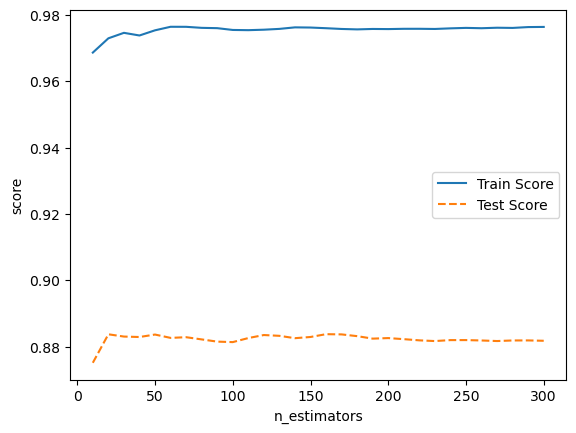

In [36]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

0-300까지 값이 0.001 차이이기 때문에 효율성을 위해 20 선택   
-> 20 하면 이후 급히 떨어지기 때문에 150으로 수정   
(0.883)

## min_samples_leaf

In [49]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf * 10 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234,n_estimators =150,  min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.858,0.850
1,20,0.823,0.839
2,30,0.801,0.825
3,40,0.784,0.813
4,50,0.772,0.804
5,60,0.760,0.794
6,70,0.753,0.789
7,80,0.746,0.781
8,90,0.738,0.771
9,100,0.734,0.767


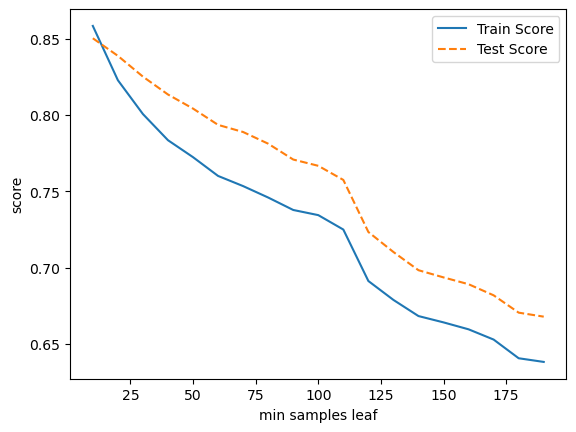

In [50]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

이 그래프에서 min_samples_leaf 값이 작을수록 Train Score와 Test Score가 높아지는 경향을 볼 수 있다.  
하지만 너무 작으면 과적합의 위험이 있기 때문에 20으로 선택한다.

## min_samples_split

In [53]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(20, 41)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 150, min_samples_leaf = 20,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,40,0.823,0.839
1,42,0.822,0.839
2,44,0.821,0.838
3,46,0.820,0.838
4,48,0.819,0.837
5,50,0.817,0.837
6,52,0.816,0.836
7,54,0.814,0.836
8,56,0.813,0.835
9,58,0.811,0.834


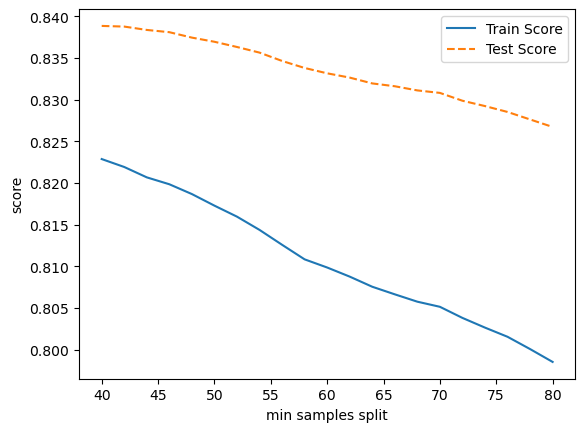

In [54]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [55]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 150,
                               min_samples_leaf = 20, min_samples_split = 40,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.473,0.521
1,2,0.644,0.676
2,3,0.729,0.761
3,4,0.777,0.804
4,5,0.803,0.828
5,6,0.816,0.836
6,7,0.821,0.838
7,8,0.822,0.838
8,9,0.823,0.839
9,10,0.823,0.839


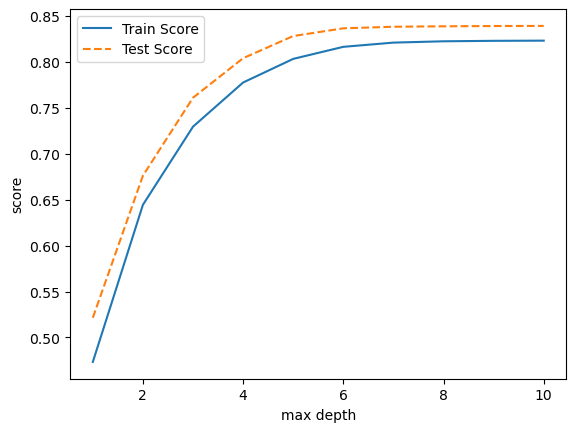

In [56]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

max_depth 안정화 구간인 6으로 선택

In [57]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 150, min_samples_leaf = 20,
                                 min_samples_split = 40, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.816
Score on test set: 0.836


In [58]:
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 2784.37961969  6824.42980193  4891.67597173  9520.08031765
  7404.64152264  9011.27277928 15807.99969052  6232.84782265
  8178.59138648 52728.72833663]


In [60]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.759
0,Year,0.171
1,Kilometers_Driven,0.023
3,Engine,0.018
2,Mileage,0.009
5,Seats,0.006
22,Transmission_Automatic,0.004
23,Transmission_Manual,0.003
29,Brand_AUDI,0.003
54,Brand_TOYOTA,0.001


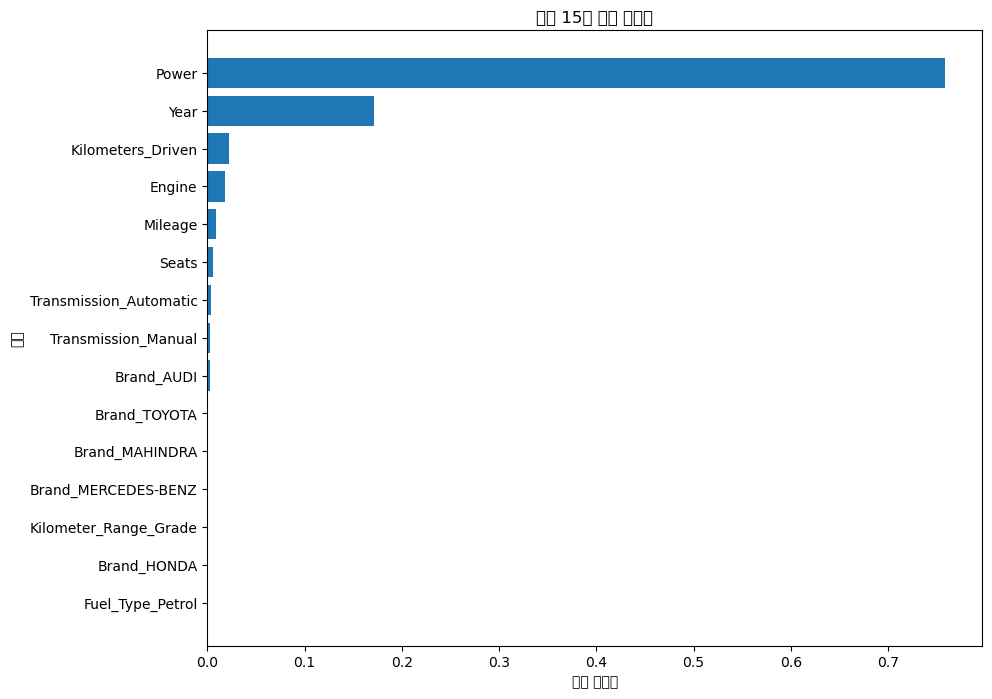

In [62]:
df_top15 = df_importance.tail(15)  # 중요도 낮은 순으로 정렬 후 상위 15개

# 인덱스를 재정렬하여 상위 15개의 변수를 표시
coordinates = range(len(df_top15))
plt.figure(figsize=(10, 8))
plt.barh(y=coordinates, width=df_top15["Importance"])
plt.yticks(coordinates, df_top15["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("상위 15개 변수 중요도")
plt.show()